In [1]:
from skimage.data import imread
from skimage.io import imshow,imsave
from skimage import img_as_float
import pandas as pd
import numpy as np
import cv2
from skimage.util import crop
from skimage.transform import rotate
from skimage.transform import resize
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
def deg_angle_between(x1,y1,x2,y2):
    from math import atan2, degrees, pi
    dx = x2 - x1
    dy = y2 - y1
    rads = atan2(-dy,dx)
    rads %= 2*pi
    degs = degrees(rads)
    return(degs)

In [12]:
def get_rotated_cropped_fish(img,x1,y1,x2,y2):
    (h,w) = img.shape[:2]
    #calculate center and angle
    center = ( (x1+x2) / 2,(y1+y2) / 2)
    angle = np.floor(-deg_angle_between(x1,y1,x2,y2))
    #print('angle=' +str(angle) + ' ')
    #print('center=' +str(center))
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img, M, (w, h))
    
    fish_length = np.sqrt((x1-x2)**2+(y1-y2)**2)
    cropped = rotated[(max((center[1]-fish_length/1.8),0)):(max((center[1]+fish_length/1.8),0)) ,
                      (max((center[0]- fish_length/1.8),0)):(max((center[0]+fish_length/1.8),0))]
    imshow(img)
    plt.show()
    imshow(rotated)
    plt.show()
    imshow(cropped)
    plt.show()
    resized = resize(cropped,(224,224))
    return(resized)

In [13]:
label_files = ['J:/work/kaggle/201701_NCFM/bet_labels.json',
             'J:/work/kaggle/201701_NCFM//alb_labels.json',
             'J:/work/kaggle/201701_NCFM/yft_labels.json',
             'J:/work/kaggle/201701_NCFM/dol_labels.json',
             'J:/work/kaggle/201701_NCFM/shark_labels.json',
             'J:/work/kaggle/201701_NCFM/lag_labels.json',
             'J:/work/kaggle/201701_NCFM/other_labels.json']

data_dirs = ['J:/work/kaggle/201701_NCFM/train/BET/',
             'J:/work/kaggle/201701_NCFM/train/ALB/',
             'J:/work/kaggle/201701_NCFM/train/YFT/',
             'J:/work/kaggle/201701_NCFM/train/DOL/',
             'J:/work/kaggle/201701_NCFM/train/SHARK/',
             'J:/work/kaggle/201701_NCFM/train/LAG/',
             'J:/work/kaggle/201701_NCFM/train/OTHER/']

image00107.jpg
img_00107.jpg


H:\Programs\Anaconda\lib\site-packages\ipykernel\__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


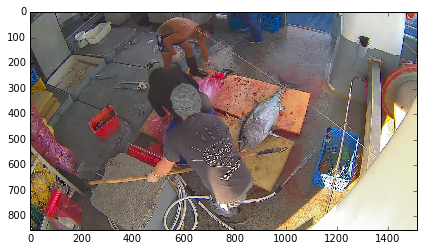

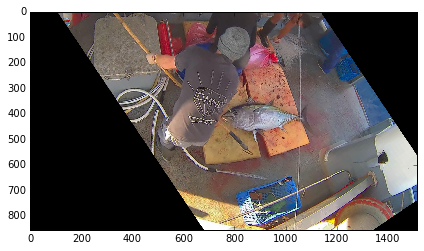

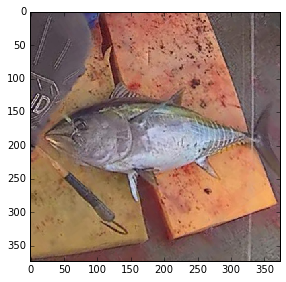

success
img_00158.jpg


H:\Programs\Anaconda\lib\site-packages\ipykernel\__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


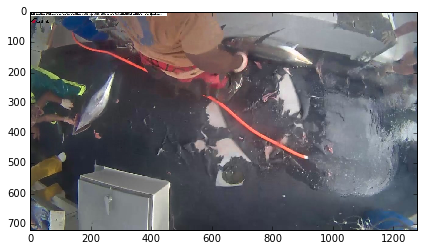

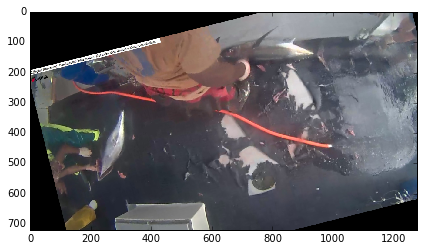

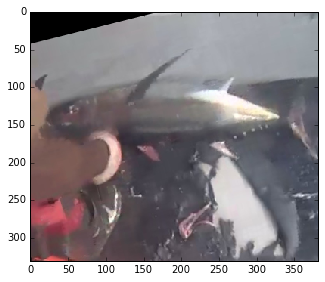

success
img_00225.jpg


H:\Programs\Anaconda\lib\site-packages\ipykernel\__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


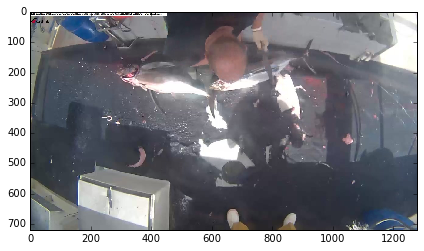

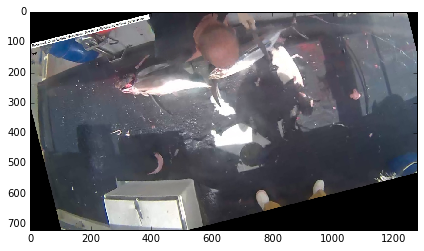

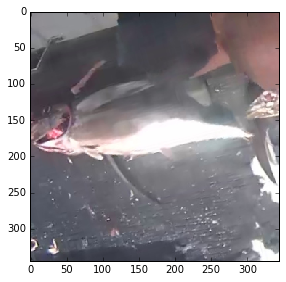

success
img_00231.jpg


H:\Programs\Anaconda\lib\site-packages\ipykernel\__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


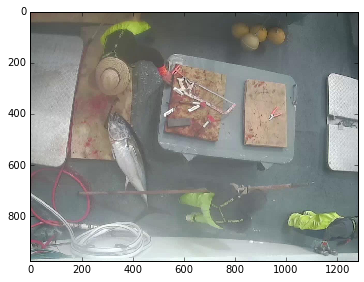

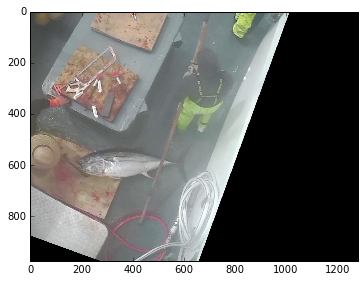

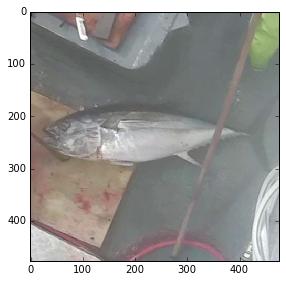

success


In [14]:
images = list()
labels_list = list()
#for c in range(7):
for c in range(1):
    labels = pd.read_json(label_files[c])
    #for i in range(len(labels)):
    for i in range(5):
        try:
            img_filename = labels.iloc[i,2]
            print(img_filename)
            l1 = pd.DataFrame((labels[labels.filename==img_filename].annotations).iloc[0])
            image = imread(data_dirs[c]+img_filename)
            images.append(get_rotated_cropped_fish(image,np.floor(l1.iloc[0,1]),np.floor(l1.iloc[0,2]),np.floor(l1.iloc[1,1]),np.floor(l1.iloc[1,2])))
            print('success')
            labels_list.append(c)
        except:
            pass

In [78]:
pd.DataFrame(labels_list).iloc[:,0].value_counts()

2    644
1    186
0    185
3    116
4    104
5     67
6     58
Name: 0, dtype: int64

In [11]:
pd.DataFrame(labels_list).iloc[:,0].value_counts()

1    1710
2     731
6     299
0     199
4     175
3     117
5      67
Name: 0, dtype: int64

In [ ]:
image

In [26]:
for i in range(len(images)):
    imsave('../preprocessed_train/img_'+str(i)+'label_'+str(labels_list[i])+'.jpg',images[i])

In [27]:
#for i in range(50):
#    fig,ax = plt.subplots(nrows=1,ncols=8,sharex="col",sharey="row",figsize=(24,3))
#    fig.suptitle(str(labels_list[(i*8):(8+i*8)]),fontsize=16)
#    for j in range(8):
#        ax[j].imshow(images[j+i*5])